# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12


In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby("type")["city"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
#  1. Get the total rides for each city type
total_drivers=city_data_df.groupby("type")["driver_count"].sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares=pyber_data_df.groupby("type")["fare"].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride=total_fares/total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver=total_fares/total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
            "Total Rides": total_rides,
            "Total Drivers": total_drivers,
            "Total Fares": total_fares,
            "Average Fare per Ride": average_fare_per_ride,
            "Average Fare per Driver": average_fare_per_driver
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.
pyber_summary_df["Total Rides"]=pyber_summary_df["Total Rides"].map('{:,}'.format)
pyber_summary_df["Total Drivers"]=pyber_summary_df["Total Drivers"].map('{:,}'.format) 
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map('${:,.2f}'.format) 
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
totalfare_per_day=pyber_data_df.groupby(["type","date"]).sum()["fare"]
totalfare_per_day
                                         

type   date            
Rural  2019-01-01 9:45     43.69
       2019-01-02 11:18    52.12
       2019-01-03 19:51    19.90
       2019-01-04 3:31     24.88
       2019-01-06 7:38     47.33
                           ...  
Urban  2019-05-08 1:54     32.69
       2019-05-08 2:31     41.33
       2019-05-08 4:20     21.99
       2019-05-08 4:39     18.45
       2019-05-08 7:29     18.55
Name: fare, Length: 2364, dtype: float64

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
totalfare_per_day=totalfare_per_day.reset_index()
totalfare_per_day

,type,date,fare
0,Rural,2019-01-01 9:45,43.69
1,Rural,2019-01-02 11:18,52.12
2,Rural,2019-01-03 19:51,19.90
3,Rural,2019-01-04 3:31,24.88
4,Rural,2019-01-06 7:38,47.33
...,...,...,...
2359,Urban,2019-05-08 1:54,32.69
2360,Urban,2019-05-08 2:31,41.33
2361,Urban,2019-05-08 4:20,21.99
2362,Urban,2019-05-08 4:39,18.45


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
totalfare_per_day_pivot=totalfare_per_day.pivot(index='date',columns='type',values='fare')
totalfare_per_day_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54,NaN,NaN,32.69
2019-05-08 2:31,NaN,NaN,41.33
2019-05-08 4:20,NaN,NaN,21.99


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

jan_to_april_fare=totalfare_per_day_pivot.loc['2019-01-01':'2019-04-29']
jan_to_april_fare

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_to_april_fare.index=pd.to_datetime(jan_to_april_fare.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_april_fare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_to_april_fare_per_week=jan_to_april_fare.resample("W").sum()
jan_to_april_fare_per_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [25]:
jan_to_april_fare_per_week.describe()

type,Rural,Suburban,Urban
count,17.000000,17.000000,17.000000
mean,230.217059,1051.961176,2180.340000
std,113.517344,186.173886,213.689551
min,67.650000,721.600000,1661.680000
25%,175.140000,925.270000,2050.430000
50%,191.850000,1045.060000,2218.200000
75%,303.940000,1149.270000,2356.700000
max,501.240000,1412.740000,2470.930000


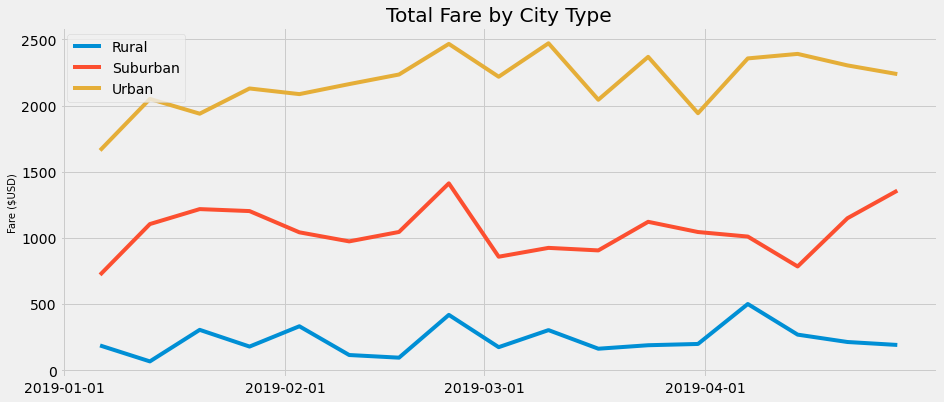

In [30]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(jan_to_april_fare_per_week)
ax.set_ylabel('Fare ($USD)',fontsize=10)
ax.set_xticks(pd.date_range(start = "2019-01-01", end = "2019-04-30", freq="MS"))
ax.set_title("Total Fare by City Type")
ax.legend(["Rural","Suburban","Urban"])
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("resources")

